# Table of Contents:
* [1.) Imports](#imports)
* [2.) First look into data](#first-look)
* [3.) EDA](#eda)
   * [3.1) Numeric variables](#numeric-variables)
   * [3.2) Categorical variables](#categorical-variables)
   * [3.3) Correlation matrix](#correlation-matrix)
* [4.) Hypothesis](#hypothesis)
* [5.) Prepare test and train data](#preperation)
* [6.) Apply training](#training)

## 1.) Imports <a class="anchor" id="imports"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = "data"
SUBMISSIONS_PATH = "submissions"

## 2.) First look into data <a class="anchor" id="first-look"></a>

In [3]:
df_train = pd.read_csv(f"{DATA_PATH}/train.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3.) EDA <a class="anchor" id="eda"></a>

In [6]:
males = df_train[df_train["Sex"] == "male"]
females = df_train[df_train["Sex"] == "female"]

males

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


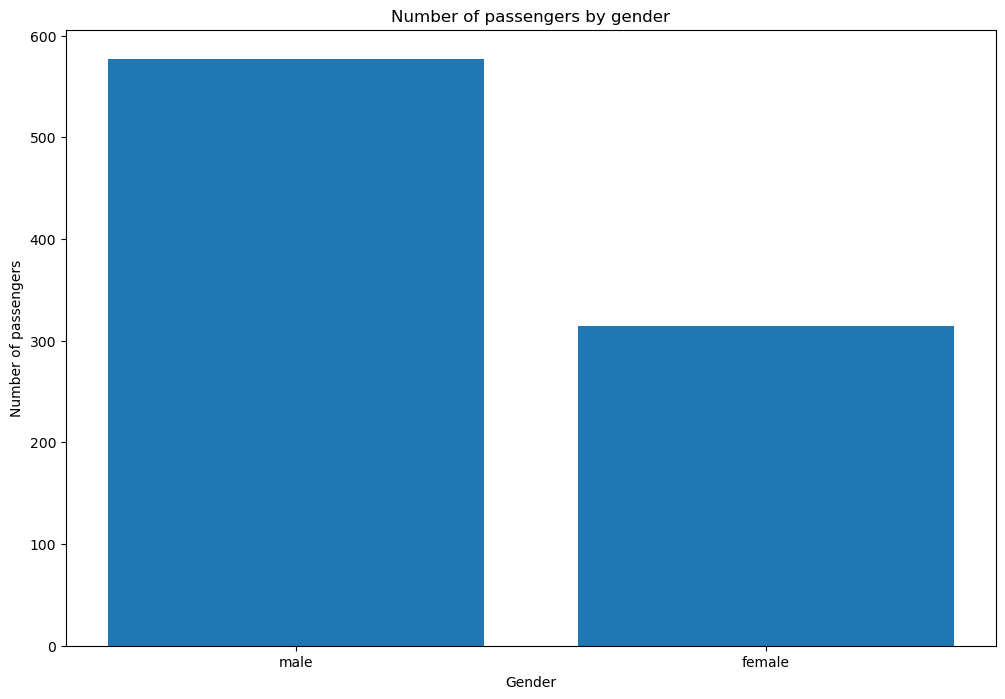

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
genders = ["male", "female"]
ax.bar(genders, [len(males), len(females)])
plt.title("Number of passengers by gender")
plt.xlabel("Gender")
plt.ylabel("Number of passengers")
plt.show()

In [8]:
survived = df_train[df_train["Survived"] == 1].groupby("Sex").count()["Survived"]
survived

Sex
female    233
male      109
Name: Survived, dtype: int64

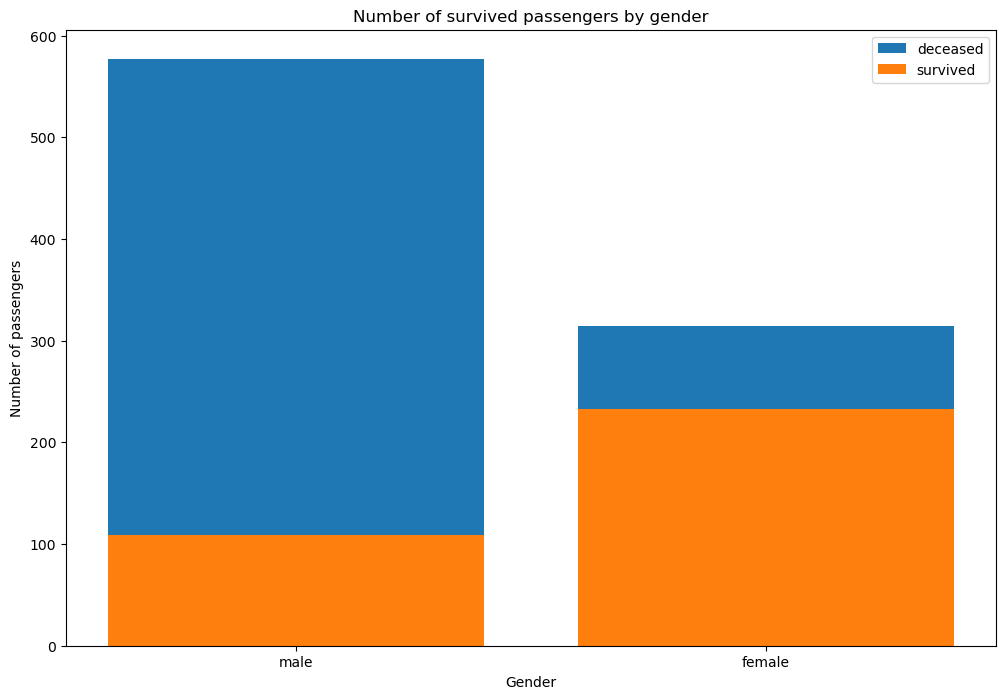

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
genders = ["male", "female"]
ax.bar(genders, [len(males), len(females)], label="deceased")
ax.bar(genders, [ survived["male"], survived["female"] ], label="survived")
plt.title("Number of survived passengers by gender")
plt.xlabel("Gender")
plt.ylabel("Number of passengers")
plt.legend()
plt.show()

In [10]:
numeric_columns = ["Age", "SibSp", "Parch", "Fare"]
categorical_columns = ["Survived", "Pclass", "Sex", "Ticket", "Cabin", "Embarked"]

df_train_num = df_train[numeric_columns]
df_train_cat = df_train[categorical_columns]

### 3.1) Numeric variables <a class="anchor" id="numeric-variables"></a>

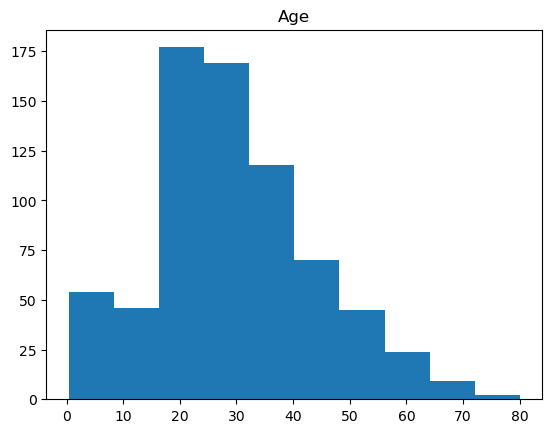

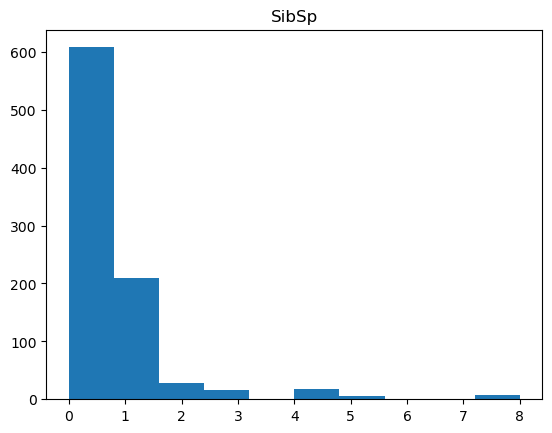

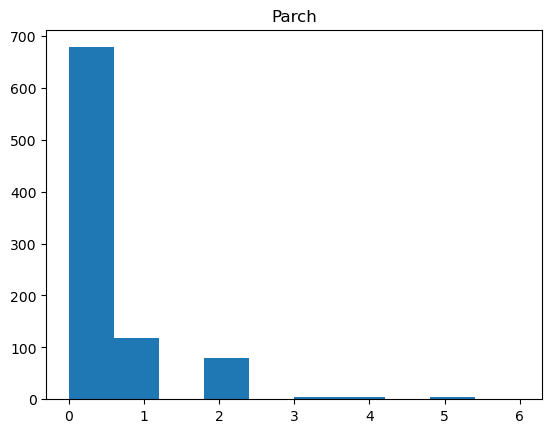

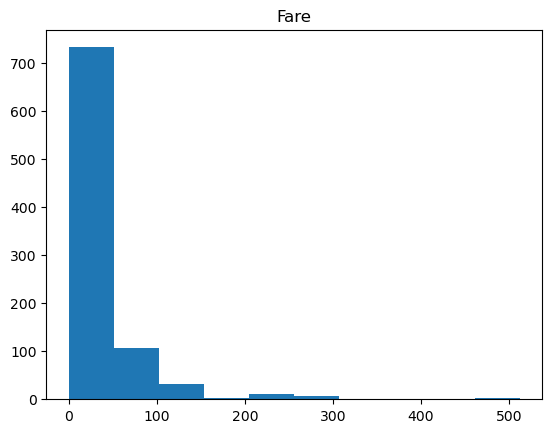

In [11]:
for col in numeric_columns:
    plt.hist(df_train[col])
    plt.title(col)
    plt.show()

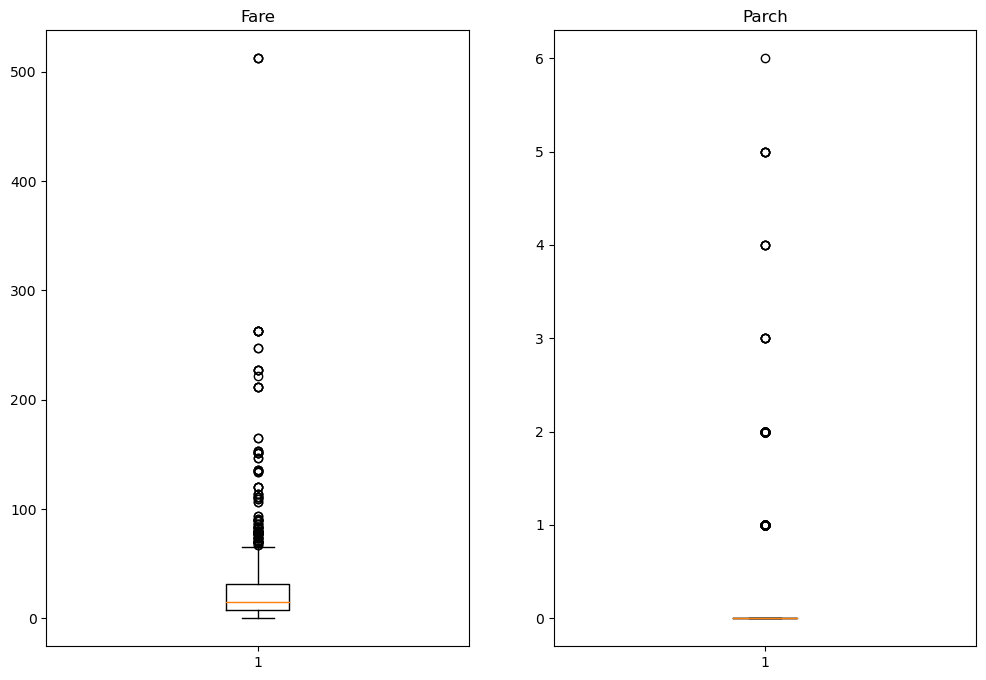

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 8))
ax[0].boxplot(df_train["Fare"])
ax[0].set_title("Fare")
ax[1].boxplot(df_train["Parch"])
ax[1].set_title("Parch")
plt.show()

Fare and Parch seem to be far apart from a normal distribution, we might consider logarithmize it.

### 3.2) Categorical variables <a class="anchor" id="categorical-variables"></a>

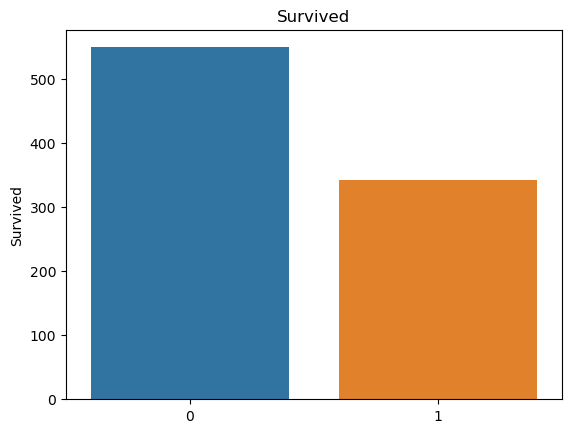

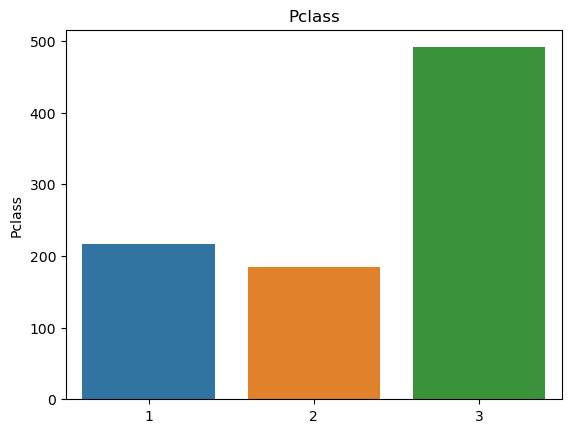

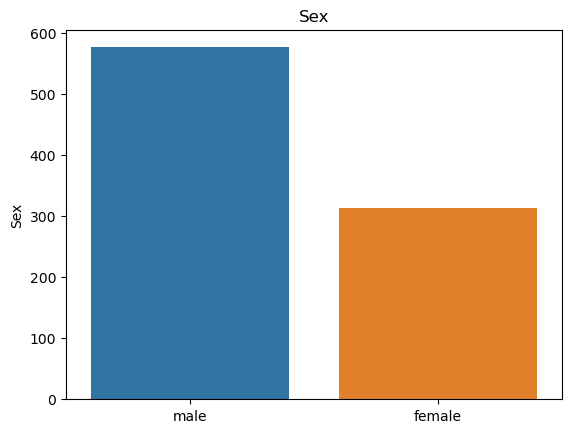

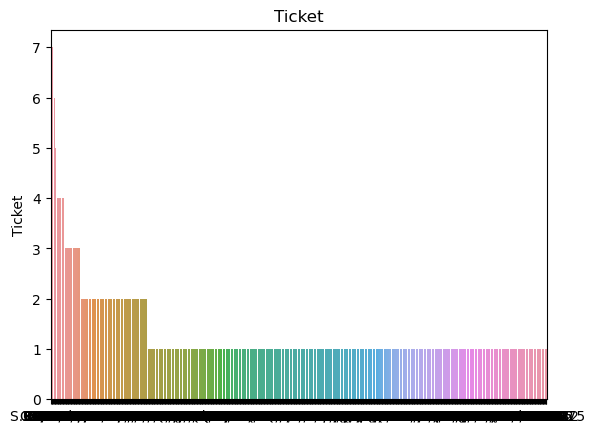

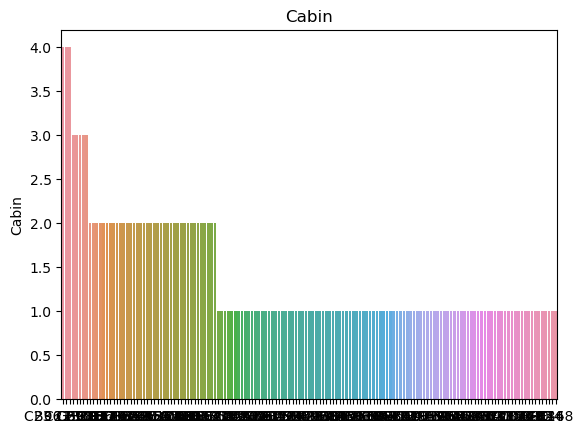

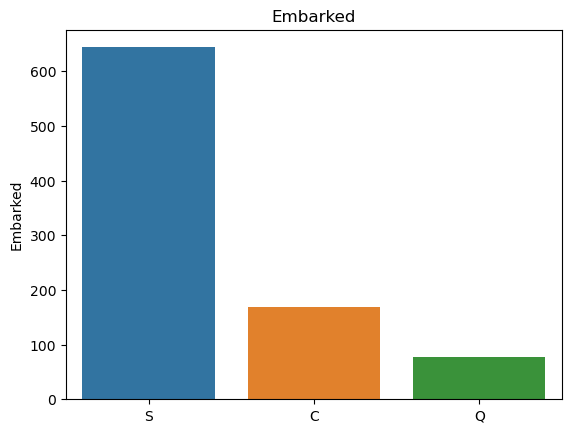

In [13]:
for col in categorical_columns:
    sns.barplot(x=df_train[col].value_counts().index, y=df_train_cat[col].value_counts()).set_title(col)
    plt.title(col)
    plt.show()

Features "Ticket" and "Cabin" have too many possible values. It might be a good idea to simplifiy this data.

### 3.3) Correlation matrix <a class="anchor" id="correlation-matrix"></a>

In [14]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


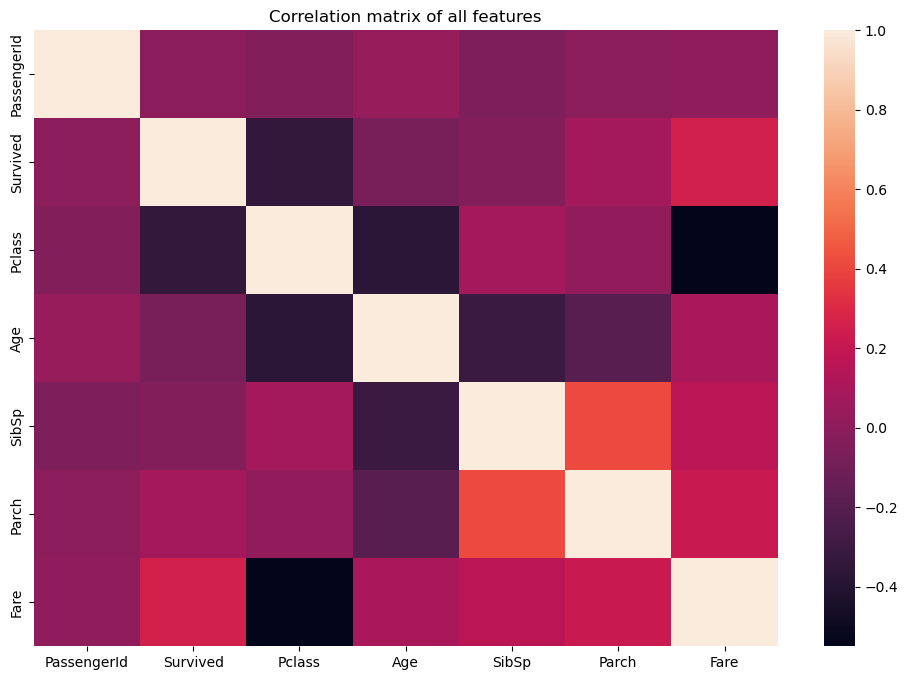

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_train.corr(), ax=ax).set_title("Correlation matrix of all features")
plt.show()

In [16]:
pd.pivot_table(df_train, index="Survived", values=["Age", "SibSp", "Parch", "Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [17]:
pd.pivot_table(df_train, index="Survived", columns="Sex", values="Ticket", aggfunc="count") 

Sex,female,male
Survived,,
0,81,468
1,233,109


In [18]:
pd.pivot_table(df_train, index="Survived", columns="Pclass", values="Ticket", aggfunc="count") 

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [19]:
pd.pivot_table(df_train, index="Survived", columns="Embarked", values="Ticket", aggfunc="count") 

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


Seeming correlations:
- Parch and Sibsp
- Fare and Survived
- Fare and Pclass
- Survived and Pclass
- Age and Pclass
- SibsP and Age

Investigate properties of Sex in relation to other variables:

## 4.) Hypothesis <a class="anchor" id="hypothesis"></a>

### Fare and Survived are correlated
The higher the fare, the higher might be the chance to survive and vice versa. This might a important feature.

### Fare and Pclass are correlated
The higher the fare, the better Pclass is being obtained as per price. Might also be an important information.

### Survived and Pclass are correlated
Similiar as to fare and survived, the pclass might indicate the chance of surviving.

### Genders matter
Females have a higher chance to survive, since they were saved in the first place.

### Features that probably don't matter:
- PassengerId
- Name

But we may look wheter any title may impact on the survival rate.

### Feature Engineering Ideas:
- Title:
  - Extract a title if given and add it as a feature. This might have an impact on the survival. We can then omit the name.
- Ticket:
  - Ticket is being made up of a ticket number and a class (=Pclass). Consider simplify this feature.
- Cabin
  - Cabins are only provided at the highest ticket class (Pclass=1).
- Family size:
  - Add a feature of family size. The bigger the family, the higher might be the chance the family might survive.

### Extract title

In [20]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer'] 

In [21]:
import string
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    return np.nan

In [22]:
df_train["Title"] = df_train["Name"].map(lambda x: substrings_in_string(x, title_list))
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [23]:
def simpliyfy_title(df):
    title = df["Title"]
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if df['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [24]:
df_train['Title'] = df_train.apply(simpliyfy_title, axis=1)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Mr
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [25]:
df_train.drop(["Name"], axis=1, inplace=True)
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Mr
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,Mr


In [26]:
df_train.drop(["PassengerId"], axis=1, inplace=True)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Mr
887,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,1,1,male,26.0,0,0,111369,30.0000,C148,C,Mr


### Add deck information instead of Cabin

In [27]:
def extract_deck(cabin):
    if isinstance(cabin, float):
        return "Unknown"
    return cabin[0]
    

In [28]:
df_train["Deck"] = df_train["Cabin"].map(lambda x: extract_deck(x))
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Unknown
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Unknown
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,C
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Mr,Unknown
887,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss,B
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,Unknown
889,1,1,male,26.0,0,0,111369,30.0000,C148,C,Mr,C


In [29]:
df_train.drop(["Cabin"], axis=1, inplace=True)

### Add a familiy size feature.

In [30]:
df_train['Family_Size'] = df_train['SibSp'] + df_train['Parch']
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck,Family_Size
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,Unknown,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,C,1
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Unknown,0
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,C,1
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S,Mr,Unknown,0
887,1,1,female,19.0,0,0,112053,30.0000,S,Miss,B,0
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S,Miss,Unknown,3
889,1,1,male,26.0,0,0,111369,30.0000,C,Mr,C,0


In [31]:
df_train.isna().sum()

Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Title            0
Deck             0
Family_Size      0
dtype: int64

We need to have a strategy handling the missing values for age. We can't just throw away 177 entries. A reasonable approach in this case might be to use the rounded median age for the specific gender.
Considering the 2 missing entries in Embarked, we might just throw them away.

In [32]:
ages_by_sex = df_train.groupby("Sex")["Age"].median()
ages_by_sex

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [33]:
df_train["Age"] = df_train.apply(lambda x: ages_by_sex[x["Sex"]], axis=1)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck,Family_Size
0,0,3,male,29.0,1,0,A/5 21171,7.2500,S,Mr,Unknown,1
1,1,1,female,27.0,1,0,PC 17599,71.2833,C,Mrs,C,1
2,1,3,female,27.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Unknown,0
3,1,1,female,27.0,1,0,113803,53.1000,S,Mrs,C,1
4,0,3,male,29.0,0,0,373450,8.0500,S,Mr,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,29.0,0,0,211536,13.0000,S,Mr,Unknown,0
887,1,1,female,27.0,0,0,112053,30.0000,S,Miss,B,0
888,0,3,female,27.0,1,2,W./C. 6607,23.4500,S,Miss,Unknown,3
889,1,1,male,29.0,0,0,111369,30.0000,C,Mr,C,0


In [34]:
df_train.isna().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Title          0
Deck           0
Family_Size    0
dtype: int64

In [35]:
df_train.dropna(inplace=True)
df_train.isna().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Deck           0
Family_Size    0
dtype: int64

In [36]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck,Family_Size
0,0,3,male,29.0,1,0,A/5 21171,7.2500,S,Mr,Unknown,1
1,1,1,female,27.0,1,0,PC 17599,71.2833,C,Mrs,C,1
2,1,3,female,27.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Unknown,0
3,1,1,female,27.0,1,0,113803,53.1000,S,Mrs,C,1
4,0,3,male,29.0,0,0,373450,8.0500,S,Mr,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,29.0,0,0,211536,13.0000,S,Mr,Unknown,0
887,1,1,female,27.0,0,0,112053,30.0000,S,Miss,B,0
888,0,3,female,27.0,1,2,W./C. 6607,23.4500,S,Miss,Unknown,3
889,1,1,male,29.0,0,0,111369,30.0000,C,Mr,C,0


In [37]:
print(f"Percentage of unique values in 'Ticket' {len(df_train['Ticket'].unique()) / len(df_train['Ticket']) * 100} %")

Percentage of unique values in 'Ticket' 76.4904386951631 %


In [38]:
if "Ticket" in df_train.columns:
    df_train.drop(["Ticket"], axis=1, inplace=True)

In [39]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,Family_Size
0,0,3,male,29.0,1,0,7.2500,S,Mr,Unknown,1
1,1,1,female,27.0,1,0,71.2833,C,Mrs,C,1
2,1,3,female,27.0,0,0,7.9250,S,Miss,Unknown,0
3,1,1,female,27.0,1,0,53.1000,S,Mrs,C,1
4,0,3,male,29.0,0,0,8.0500,S,Mr,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,29.0,0,0,13.0000,S,Mr,Unknown,0
887,1,1,female,27.0,0,0,30.0000,S,Miss,B,0
888,0,3,female,27.0,1,2,23.4500,S,Miss,Unknown,3
889,1,1,male,29.0,0,0,30.0000,C,Mr,C,0


In [40]:
df_train = pd.get_dummies(df_train)
df_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,...,Title_Mrs,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown
0,0,3,29.0,1,0,7.2500,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,27.0,1,0,71.2833,1,1,0,1,...,1,0,0,1,0,0,0,0,0,0
2,1,3,27.0,0,0,7.9250,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,27.0,1,0,53.1000,1,1,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,3,29.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,29.0,0,0,13.0000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
887,1,1,27.0,0,0,30.0000,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
888,0,3,27.0,1,2,23.4500,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1,1,29.0,0,0,30.0000,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0


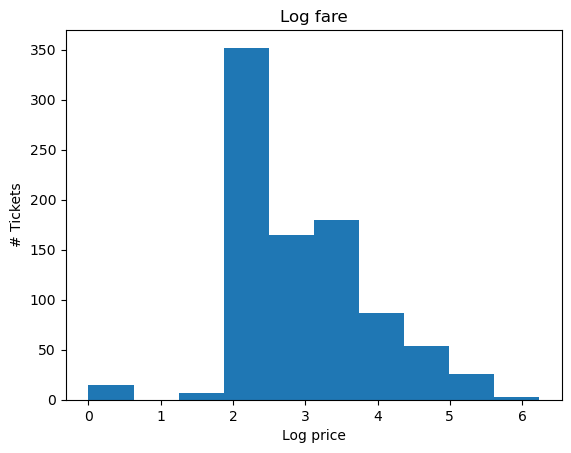

In [41]:
plt.hist(df_train["Fare"].apply(lambda x: np.log(x) if x > 0.0 else 0.0))
plt.title("Log fare")
plt.xlabel("Log price")
plt.ylabel("# Tickets")
plt.show()

### Define Features & Targets

In [42]:
X_train = df_train.drop(["Survived"], axis=1)
X_train

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Title_Mrs,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown
0,3,29.0,1,0,7.2500,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,27.0,1,0,71.2833,1,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2,3,27.0,0,0,7.9250,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,27.0,1,0,53.1000,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,3,29.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,29.0,0,0,13.0000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
887,1,27.0,0,0,30.0000,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
888,3,27.0,1,2,23.4500,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1,29.0,0,0,30.0000,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [43]:
y_test = df_train["Survived"]
y_test

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

### Normalize data

In [44]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [45]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [46]:
X_train = scaler.fit_transform(X_train)
X_train

array([[1.   , 1.   , 0.125, ..., 0.   , 0.   , 1.   ],
       [0.   , 0.   , 0.125, ..., 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , ..., 0.   , 0.   , 1.   ],
       ...,
       [1.   , 0.   , 0.125, ..., 0.   , 0.   , 1.   ],
       [0.   , 1.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [1.   , 1.   , 0.   , ..., 0.   , 0.   , 1.   ]])

## 5.) Prepare train and test data  <a class="anchor" id="preperation"></a>

In [47]:
def read_and_clean_data(df, label, dummies=True):
    print(f"Working on {label}...")
    # Add title feature.
    df["Title"] = df["Name"].map(lambda x: substrings_in_string(x, title_list))
    df['Title'] = df.apply(simpliyfy_title, axis=1)
    print("Added title feature...")
    
    # Remove unnecessary columns.
    df.drop(["Name"], axis=1, inplace=True)
    df.drop(["PassengerId"], axis=1, inplace=True)
    print("Removed unnecessary columns...")
    
    # Create feature deck.
    df["Deck"] = df["Cabin"].map(lambda x: extract_deck(x))
    df.drop(["Cabin"], axis=1, inplace=True)
    print("Created deck feature...")
    
    # Fix age feature.
    median_ages_by_deck_sex = df.groupby(["Deck", "Sex"]).median()["Age"]
    df["Age"] = df.apply(lambda x: median_ages_by_deck_sex[x["Deck"]][x["Sex"]] if pd.isnull(x["Age"]) else x["Age"], axis=1)
    print("Fixed possible na values for age...")
        
    # Fix fare feature.
    median_fares_by_deck = df.groupby("Deck").median()["Fare"]
    df["Fare"] = df.apply(lambda x: median_fares_by_deck[x["Deck"]] if pd.isnull(x["Fare"]) else x["Fare"], axis=1)
    print("Fixed possible na values for fare...")
    
    # Drop Ticket.
    df.drop(["Ticket"], axis=1, inplace=True)
    print("Removed ticket column...")
        
    # Categorical features to dummies.
    if dummies:
        df = pd.get_dummies(df)
        print("Created dummies for categorical features...")
    
    # Return data
    X, y = ( df.drop("Survived", axis=1), df["Survived"] ) if "Survived" in df else ( df, None )
    print("Transformation done!")
    
    return X, y

In [48]:
def adjust_missing_cols(train, test):
    missing_cols = set(train.columns) - set(test.columns)
    for c in missing_cols:
        test[c] = 0.0
    test = test[train.columns]
    return test

In [49]:
def scale_data(df, scaler):
    X = scaler.fit_transform(df)
    return X

In [50]:
train_data = pd.read_csv(f"{DATA_PATH}/train.csv")
test_data = pd.read_csv(f"{DATA_PATH}/test.csv")

In [51]:
X_train, y_train = read_and_clean_data(train_data, "train")
X_test, y_test = read_and_clean_data(test_data, "test")

Working on train...
Added title feature...
Removed unnecessary columns...
Created deck feature...
Fixed possible na values for age...
Fixed possible na values for fare...
Removed ticket column...
Created dummies for categorical features...
Transformation done!
Working on test...
Added title feature...
Removed unnecessary columns...
Created deck feature...
Fixed possible na values for age...
Fixed possible na values for fare...
Removed ticket column...
Created dummies for categorical features...
Transformation done!


In [52]:
def adjust_missing_cols(train, test):
    missing_cols = set(train.columns) - set(test.columns)
    for c in missing_cols:
        test[c] = 0.0
    test = test[train.columns]
    return test

In [53]:
X_test = adjust_missing_cols(X_train, X_test)
X_test.shape

(418, 23)

In [54]:
X_train = scale_data(X_train, StandardScaler())
X_test = scale_data(X_test, StandardScaler())

In [55]:
X_train

array([[ 0.82737724, -0.55214715,  0.43279337, ..., -0.06715343,
        -0.03352008,  0.54492498],
       [-1.56610693,  0.6671546 ,  0.43279337, ..., -0.06715343,
        -0.03352008, -1.835115  ],
       [ 0.82737724, -0.24732171, -0.4745452 , ..., -0.06715343,
        -0.03352008,  0.54492498],
       ...,
       [ 0.82737724, -0.32352807,  0.43279337, ..., -0.06715343,
        -0.03352008,  0.54492498],
       [-1.56610693, -0.24732171, -0.4745452 , ..., -0.06715343,
        -0.03352008, -1.835115  ],
       [ 0.82737724,  0.20991645, -0.4745452 , ..., -0.06715343,
        -0.03352008,  0.54492498]])

In [56]:
X_test

array([[ 0.87348191,  0.40319418, -0.49947002, ..., -0.04897021,
         0.        ,  0.52752958],
       [ 0.87348191,  1.37648576,  0.61699237, ..., -0.04897021,
         0.        ,  0.52752958],
       [-0.31581919,  2.54443564, -0.49947002, ..., -0.04897021,
         0.        ,  0.52752958],
       ...,
       [ 0.87348191,  0.71464749, -0.49947002, ..., -0.04897021,
         0.        ,  0.52752958],
       [ 0.87348191, -0.25864409, -0.49947002, ..., -0.04897021,
         0.        ,  0.52752958],
       [ 0.87348191, -0.25864409,  0.61699237, ..., -0.04897021,
         0.        ,  0.52752958]])

In [57]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [58]:
y_train = y_train.values
y_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [59]:
y_test == None

True

In [60]:
X_train.shape

(891, 23)

## 6.) Apply training  <a class="anchor" id="training"></a>

We will train multiple classifiers and track down their performance. Finally we will apply a neural network and compare its performance with the others.

In [61]:
# Import classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [62]:
clfs = [GaussianNB(), tree.DecisionTreeClassifier(), LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(), SVC()]
clfs

[GaussianNB(),
 DecisionTreeClassifier(),
 LogisticRegression(),
 RandomForestClassifier(),
 KNeighborsClassifier(),
 SVC()]

In [63]:
clfs_labels = ["Naive Bayes", "Decision Tree", "Logistic Regression", "RandomForestClassifier", "KNN", "SVM"]
clfs_labels

['Naive Bayes',
 'Decision Tree',
 'Logistic Regression',
 'RandomForestClassifier',
 'KNN',
 'SVM']

In [64]:
all( callable(getattr(clf, "score", None)) for clf in clfs), all( callable(getattr(clf, "fit", None)) for clf in clfs), all( callable(getattr(clf, "predict", None)) for clf in clfs)

(True, True, True)

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
# Compare training perfomance via cross val score.
train_accuracies = [cross_val_score(clf, X_train, y_train) for clf in clfs]
train_accuracies

[array([0.67597765, 0.71910112, 0.71910112, 0.71910112, 0.73033708]),
 array([0.75977654, 0.76966292, 0.84269663, 0.73033708, 0.76966292]),
 array([0.82122905, 0.8258427 , 0.79775281, 0.81460674, 0.85955056]),
 array([0.80446927, 0.78089888, 0.84269663, 0.74157303, 0.84831461]),
 array([0.82122905, 0.7752809 , 0.8258427 , 0.79775281, 0.84831461]),
 array([0.83798883, 0.79775281, 0.82022472, 0.78651685, 0.87640449])]

In [67]:
train_accuracies_mean = [np.mean(acc) for acc in train_accuracies]
train_accuracies_mean

[0.7127236206138974,
 0.7744272173749293,
 0.8237963718536185,
 0.8035904839620865,
 0.813684012303057,
 0.8237775406440274]

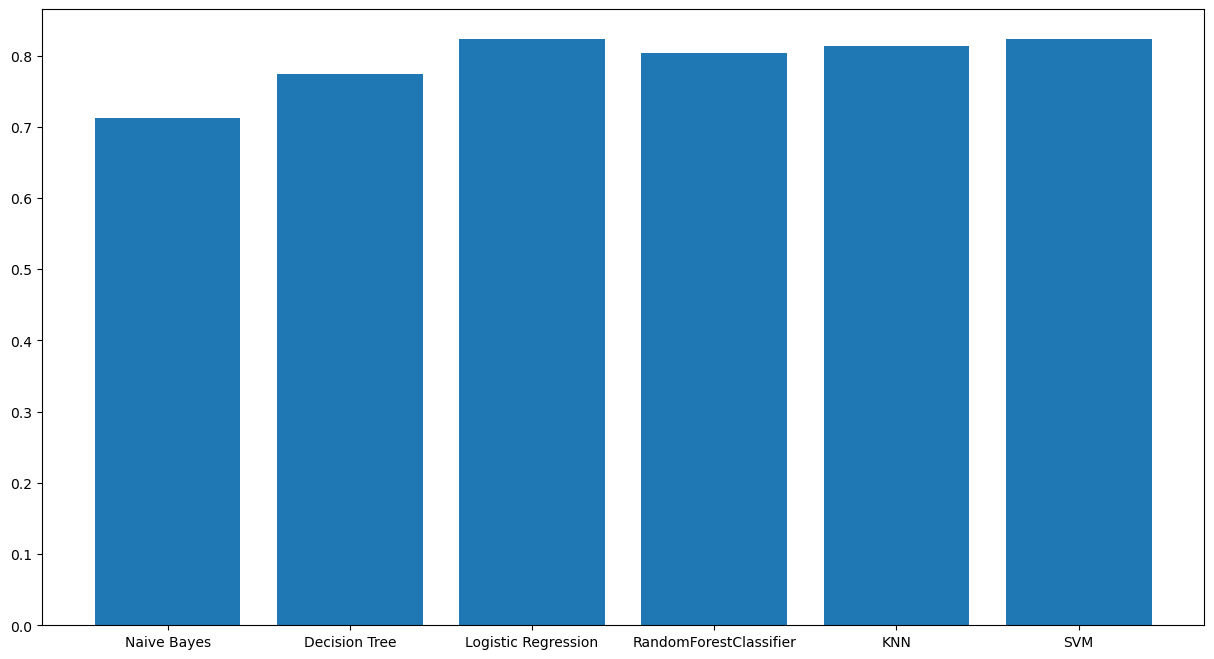

In [68]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(clfs_labels, train_accuracies_mean)
plt.show()

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
decision_tree_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": [5, 10, 25, 50, 100, 200],
}

log_regrewsion_grid = {
    "penalty": ["none", "l2", "l1", "elasticnet"],
    "max_iter": [10, 25, 50, 100, 200]
}

random_forest_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_features": ["sqrt", "log2", None],
    "max_depth": [5, 10, 25, 50, 100, 200],
}

knn_grid = {
    "n_neighbors": [3, 5, 10, 20],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": [3, 5, 10, 20, 30, 40, 60],
    "p": [1, 2],
}

svm_grid = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": [1, 2, 3],
    "gamma": ["scale", "auto"],
    "max_iter": [-1, 10, 25, 50, 100, 200],
}

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
print("Running cross validation for decision tree...")
tree_cv = GridSearchCV(clfs[1], decision_tree_grid, cv=5)
tree_cv.fit(X_train, y_train)
tree_cv.best_score_, tree_cv.best_estimator_

Running cross validation for decision tree...


(0.8170547988199109, DecisionTreeClassifier(max_depth=5, splitter='random'))

In [73]:
print("Running cross validation for logistic regression...")
log_cv = GridSearchCV(clfs[2], log_regrewsion_grid, cv=5)
log_cv.fit(X_train, y_train)
log_cv.best_score_, log_cv.best_estimator_

Running cross validation for logistic regression...


(0.8237963718536185, LogisticRegression(max_iter=25))

In [74]:
print("Running cross validation for random forest...")
random_forest_cv = GridSearchCV(clfs[3], random_forest_grid, cv=5)
random_forest_cv.fit(X_train, y_train)
random_forest_cv.best_score_, random_forest_cv.best_estimator_

Running cross validation for random forest...


(0.8361433682756889,
 RandomForestClassifier(criterion='entropy', max_depth=10, max_features=None))

In [75]:
print("Running cross validation for KNN...")
knn_cv = GridSearchCV(clfs[4], knn_grid, cv=5)
knn_cv.fit(X_train, y_train)
knn_cv.best_score_, knn_cv.best_estimator_

Running cross validation for KNN...


(0.8294017952419811,
 KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=10, p=1))

In [76]:
print("Running cross validation for SVM...")
svm_cv = GridSearchCV(clfs[5], svm_grid, cv=5)
svm_cv.fit(X_train, y_train)
svm_cv.best_score_, svm_cv.best_estimator_

Running cross validation for SVM...


(0.8237775406440274, SVC(degree=1))

In [77]:
clfs_cv = [GaussianNB(), tree_cv.best_estimator_, log_cv.best_estimator_, random_forest_cv.best_estimator_, knn_cv.best_estimator_, svm_cv.best_estimator_]
clfs_cv

[GaussianNB(),
 DecisionTreeClassifier(max_depth=5, splitter='random'),
 LogisticRegression(max_iter=25),
 RandomForestClassifier(criterion='entropy', max_depth=10, max_features=None),
 KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=10, p=1),
 SVC(degree=1)]

In [78]:
for clf_cv, label in zip(clfs_cv, clfs_labels):
    clf_cv.fit(X_train, y_train)
    print(f"Training on {label} completed...")
print("All classifiers trained!")

Training on Naive Bayes completed...
Training on Decision Tree completed...
Training on Logistic Regression completed...
Training on RandomForestClassifier completed...
Training on KNN completed...
Training on SVM completed...
All classifiers trained!


## 7.) Predict

In [79]:
clfs_cv

[GaussianNB(),
 DecisionTreeClassifier(max_depth=5, splitter='random'),
 LogisticRegression(max_iter=25),
 RandomForestClassifier(criterion='entropy', max_depth=10, max_features=None),
 KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=10, p=1),
 SVC(degree=1)]

In [80]:
clfs_labels

['Naive Bayes',
 'Decision Tree',
 'Logistic Regression',
 'RandomForestClassifier',
 'KNN',
 'SVM']

In [81]:
predictions = [clf.predict(X_test) for clf in clfs_cv]
len(predictions)

6

In [82]:
starting_passenger_id = 892
last_passenger_id = starting_passenger_id + len(test_data) - 1
last_passenger_id

1309

In [83]:
passenger_ids = np.arange(starting_passenger_id, last_passenger_id + 1)
passenger_ids[:10]

array([892, 893, 894, 895, 896, 897, 898, 899, 900, 901])

In [84]:
def create_predictions_df(predictions):
    return pd.DataFrame({
        "PassengerId": passenger_ids,
        "Survived": predictions
    })

In [85]:
predictions_df = [create_predictions_df(prediction) for prediction in predictions]
len(predictions_df)

6

In [86]:
for prediction_df, label in zip(predictions_df, clfs_labels):
    prediction_df.to_csv(f"{SUBMISSIONS_PATH}/{label}_predictions.csv", index=False)

## 7.) Use a neural network

In [94]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [88]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Prepare dataset once again. We need to scale it using min-max-scaling.

In [89]:
train_data = pd.read_csv(f"{DATA_PATH}/train.csv")
test_data = pd.read_csv(f"{DATA_PATH}/test.csv")

X_train, y_train = read_and_clean_data(train_data, "train")
X_test, y_test = read_and_clean_data(test_data, "test")

Working on train...
Added title feature...
Removed unnecessary columns...
Created deck feature...
Fixed possible na values for age...
Fixed possible na values for fare...
Removed ticket column...
Created dummies for categorical features...
Transformation done!
Working on test...
Added title feature...
Removed unnecessary columns...
Created deck feature...
Fixed possible na values for age...
Fixed possible na values for fare...
Removed ticket column...
Created dummies for categorical features...
Transformation done!


In [90]:
X_test = adjust_missing_cols(X_train, X_test)
X_test.shape

(418, 23)

In [91]:
X_train = scale_data(X_train, StandardScaler())
X_test = scale_data(X_test, StandardScaler())
X_train

array([[ 0.82737724, -0.55214715,  0.43279337, ..., -0.06715343,
        -0.03352008,  0.54492498],
       [-1.56610693,  0.6671546 ,  0.43279337, ..., -0.06715343,
        -0.03352008, -1.835115  ],
       [ 0.82737724, -0.24732171, -0.4745452 , ..., -0.06715343,
        -0.03352008,  0.54492498],
       ...,
       [ 0.82737724, -0.32352807,  0.43279337, ..., -0.06715343,
        -0.03352008,  0.54492498],
       [-1.56610693, -0.24732171, -0.4745452 , ..., -0.06715343,
        -0.03352008, -1.835115  ],
       [ 0.82737724,  0.20991645, -0.4745452 , ..., -0.06715343,
        -0.03352008,  0.54492498]])

In [92]:
X_train.shape

(891, 23)

### Build the model.

In [95]:
inputs = keras.Input(shape=(23,))
inputs

<KerasTensor: shape=(None, 23) dtype=float32 (created by layer 'input_1')>

In [96]:
dense = Dense(64, activation="relu")
x = dense(inputs)
x

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense')>

In [97]:
x = Dense(64, activation="relu")(x)
outputs = Dense(2)(x)
outputs

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_2')>

In [98]:
model = keras.Model(inputs=inputs, outputs=outputs, name="titanic-model")
model.summary()

Model: "titanic-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 23)]              0         
                                                                 
 dense (Dense)               (None, 64)                1536      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 5,826
Trainable params: 5,826
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(X_train, y_train, batch_size=20, epochs=2, validation_split=0.2)

Epoch 1/2
36/36 [==============================] - 1s 11ms/step - loss: 0.5205 - accuracy: 0.7711 - val_loss: 0.3814 - val_accuracy: 0.8436
Epoch 2/2
36/36 [==============================] - 0s 6ms/step - loss: 0.4481 - accuracy: 0.8118 - val_loss: 0.3501 - val_accuracy: 0.8603


In [100]:
predictions = model.predict(X_test)
predictions[:10]

14/14 [==============================] - 0s 2ms/step


array([[ 6.1716694e-01, -1.6139235e+00],
       [-1.2786941e-01,  4.5381233e-01],
       [ 4.8114052e-01, -1.1649852e+00],
       [ 3.6039054e-01, -1.8428073e+00],
       [ 1.3828706e-03,  4.3505496e-01],
       [ 4.9533233e-01, -2.0935767e+00],
       [-1.6112456e-01,  8.6655748e-01],
       [ 3.9243001e-01, -1.7052774e+00],
       [-4.7238865e-01,  7.9782343e-01],
       [ 4.7610456e-01, -2.4006355e+00]], dtype=float32)

In [101]:
submissions = np.argmax(predictions, axis=1)
submissions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [102]:
nn_submissions = create_predictions_df(submissions)
nn_submissions

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [103]:
nn_submissions.to_csv(f"{SUBMISSIONS_PATH}/nn_predictions.csv", index=False)

In [118]:
def build_model(activation, layer_nodes=[], hidden_layers=0,  name="titanic-model", validation_split=0.2):
    keras.backend.clear_session()
    inputs = keras.Input(shape=(23,))
    dense = Dense(64, activation=activation)
    x = dense(inputs)
    for i in range(hidden_layers):
        x = Dense(layer_nodes[i], activation=activation)(x)
    outputs = Dense(2)(x)
    model = keras.Model(inputs=inputs, outputs=outputs, name=name)
    return model

In [122]:
layer_nodes = [32]
model = build_model("relu", layer_nodes=layer_nodes, hidden_layers=1)
model.summary()

Model: "titanic-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 23)]              0         
                                                                 
 dense (Dense)               (None, 64)                1536      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 3,682
Trainable params: 3,682
Non-trainable params: 0
_________________________________________________________________


In [123]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

history = model.fit(X_train, y_train, batch_size=20, epochs=2, validation_split=0.2)

Epoch 1/2
36/36 [==============================] - 1s 9ms/step - loss: 0.5761 - accuracy: 0.7444 - val_loss: 0.4052 - val_accuracy: 0.8547
Epoch 2/2
36/36 [==============================] - 0s 5ms/step - loss: 0.4533 - accuracy: 0.8146 - val_loss: 0.3615 - val_accuracy: 0.8659


In [124]:
predictions = model.predict(X_test)
submissions = np.argmax(predictions, axis=1)
nn_submissions = create_predictions_df(submissions)
nn_submissions.to_csv(f"{SUBMISSIONS_PATH}/nn_predictions.csv", index=False)
print("Created new nn predictions csv.")

14/14 [==============================] - 0s 2ms/step
Created new nn predictions csv.


In [125]:
model.save(f"{SUBMISSIONS_PATH}/model")

INFO:tensorflow:Assets written to: submissions/model\assets
